In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sn
import math
from scipy.interpolate import griddata
from scipy.optimize import curve_fit
import netCDF4 as nc

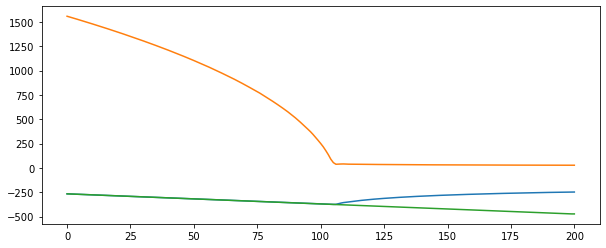

In [2]:
data = pd.read_csv('/Users/clara.henry/Documents/MISMIP/MISMIP2/DataToInterpolate.csv')
data = data.sort_values(['Points:0', 'Points:1'])
data['Points:0'] = data['Points:0']/1000
data = data.reset_index(drop=True)
data = data.drop(data[(abs(data['Points:0'] - 1050) > 100.0)].index)
xi = np.arange(950,1151,1)
dataZB = data.drop(data[(data['zb'] == 0.0)].index)
dataZS = data.drop(data[(data['zs'] == 0.0)].index)
dataBedrock = data.drop(data[(data['bedrock'] == 0.0)].index)
interZB = np.interp(xi, dataZB['Points:0'], dataZB['zb'])
interZS = np.interp(xi, dataZS['Points:0'], dataZS['zs'])
interBedrock = np.interp(xi, dataBedrock['Points:0'], dataBedrock['bedrock'])

fig, ax = plt.subplots(figsize=(10,4))
ax.plot(xi-950, interZB)
ax.plot(xi-950, interZS)
ax.plot(xi-950, interBedrock)

In [3]:
interBedrock

array([-266.16      , -267.14487762, -268.18159091, -269.2183042 ,
       -270.25501748, -271.29173077, -272.32878182, -273.36696364,
       -274.40514545, -275.44332727, -276.48150909, -277.51969091,
       -278.55754717, -279.59528302, -280.63301887, -281.67075472,
       -282.70849057, -283.74686275, -284.78607843, -285.82529412,
       -286.8645098 , -287.90372549, -288.94207317, -289.97865854,
       -291.0152439 , -292.05182927, -293.08841463, -294.12560254,
       -295.16365751, -296.20171247, -297.23976744, -298.27782241,
       -299.31540659, -300.35276923, -301.39013187, -302.42749451,
       -303.46504566, -304.50385845, -305.54267123, -306.58148402,
       -307.6202968 , -308.65843602, -309.69635071, -310.7342654 ,
       -311.77218009, -312.80953317, -313.84638821, -314.88324324,
       -315.92009828, -316.9638342 , -318.01564767, -319.06746114,
       -320.11927461, -321.15736842, -322.18631579, -323.21526316,
       -324.24421053, -325.28777778, -326.335     , -327.38222

In [4]:
dataVel = data.loc[abs(data['Points:0'] - 950) < 1]
dataVel

,bedrock,zs,zb,depth,height,velocity:0,velocity:1,velocity:2,Points:0,Points:1,Points:2
1092,-266.16,0.0,-266.16,1823.200,0.000,135.86,-0.14103,0,950.05,-266.1600,0
1093,-266.16,0.0,0.00,1732.000,91.158,140.59,-0.21171,0,950.05,-175.0000,0
1094,-266.16,0.0,0.00,1640.800,182.320,144.63,-0.28283,0,950.05,-83.8390,0
1095,-266.16,0.0,0.00,1549.700,273.470,148.05,-0.35487,0,950.05,7.3185,0
1096,-266.16,0.0,0.00,1458.500,364.630,150.92,-0.42723,0,950.05,98.4760,0
1097,-266.16,0.0,0.00,1367.400,455.790,153.30,-0.49969,0,950.05,189.6300,0
1098,-266.16,0.0,0.00,1276.200,546.950,155.25,-0.57203,0,950.05,280.7900,0
1099,-266.16,0.0,0.00,1185.100,638.110,156.83,-0.64408,0,950.05,371.9500,0
1100,-266.16,0.0,0.00,1093.900,729.260,158.09,-0.71575,0,950.05,463.1100,0
1101,-266.16,0.0,0.00,1002.700,820.420,159.08,-0.78695,0,950.05,554.2700,0


[ 25.599784   568.2028223  136.32476492]


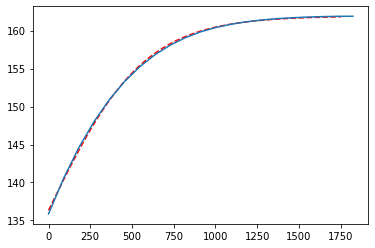

In [5]:
# objective function
def func(x, a, b, c):
    return a * np.tanh(x/b) + c

# fit curve
popt, pcov = curve_fit(func, dataVel['height'], dataVel['velocity:0'], p0=(21,500,135))

a, b, c = popt
print(popt)
x_line = np.arange(0, 1751, 1)
y_line = func(x_line, a, b, c)

plt.plot(x_line, y_line, '--', color='red')
plt.plot(dataVel['height'], dataVel['velocity:0'])

In [6]:
ds.close()

NameError: name 'ds' is not defined

fn = '/Users/clara.henry/Documents/ElmerFiles/MISMIP/mmp2.nc'
ds = nc.Dataset(fn, 'w', format='NETCDF4')

x = ds.createDimension('x', 201)
y = ds.createDimension('y', 61)

X = ds.createVariable('x', 'f4', ('x',))
Y = ds.createVariable('y', 'f4', ('y',))
Zs = ds.createVariable('zs', 'f4', ('x', 'y',))
Zb = ds.createVariable('zb', 'f4', ('x', 'y',))
Bedrock = ds.createVariable('bedrock', 'f4', ('x', 'y',))

ds.close()

In [10]:
fn = '/Users/clara.henry/Documents/MISMIP/mmp.nc'
ds = nc.Dataset(fn, 'w', format='NETCDF4')

y = ds.createDimension('y', 201)
x = ds.createDimension('x', 61)

Y = ds.createVariable('y', 'f4', ('y',))
X = ds.createVariable('x', 'f4', ('x',))
Zs = ds.createVariable('zs', 'f4', ('y', 'x',))
Zb = ds.createVariable('zb', 'f4', ('y', 'x',))
Bedrock = ds.createVariable('bedrock', 'f4', ('y', 'x',))

Y[:] = np.arange(0, 201, 1)
X[:] = np.arange(-30, 31, 1)
'''
def AF(x1, y1):
    return 500 * np.exp(-(((x1 - 175)**2 + (y1)**2)**2)/(2*8**4))


for i in range(len(X[:])):
    for j in range(len(Y[:])):
        Zs[i, j] = interZS[i] + AF(X[i], Y[j])
        Zb[i, j] = interZB[i] + AF(X[i], Y[j])
        Bedrock[i, j] = interBedrock[i] + AF(X[i], Y[j])
'''

            
ds.close()

In [ ]:
ds.close()